In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

In [4]:
#Data Operations

####################################################################################
# Data from Files
def GetData1(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])

    return x, y, err, xstep, ystep

def GetData2(filename1,filename2):
    x1, y1, err1, xstep1, ystep1 = GetData1(filename1)
    x2, y2, err2, xstep2, ystep2 = GetData1(filename2)
    x = x1
    y = 0.5*(y1+y2)
    err = 0.5*np.sqrt(err1*err1+err2*err2)
    xstep = xstep1
    ystep = 0.5*(ystep1+ystep2)
    return x, y, err, xstep, ystep

def GetExpData(filename):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]
    y = data[:,3]
    err = data[:,4]
    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(data[:,3],data[-1,3])
    sysp = np.append(data[:,6],data[-1,6])
    sysm = -sysp
    #print(len(data[0,:]))
    if len(data[0,:]) > 7:
        sysm = np.append(data[:,7],data[-1,7])
    return x, y, err, xstep, ystep, sysp, sysm

def GetDataRatio(x1, y1, err1, xstep1, ystep1, x2, y2, err2, xstep2, ystep2):
    x = x1
    y, err = RatioError(y1, err1, y2, err2)
    xstep = xstep1
    ystep = ystep1/ystep2
    return x, y, err, xstep, ystep

####################################################################################
# Errors
def RatioError(y1, err1, y2, err2):
    return y1/y2, np.sqrt( (err1/y2)*(err1/y2) + (y1*err2/y2/y2)*(y1*err2/y2/y2) )

def ProdError(y1, err1, y2, err2):
    return y1*y2, np.sqrt( y2*y2*err1*err1 + y1*y1*err2*err2 )

def SumError(y1, err1, y2, err2, pm=1.):
    return y1 + pm*y2, np.sqrt( err1*err1 + err2*err2 )
####################################################################################
# Integration
def GetData1Integrate(filename,bin=0):
    data = np.loadtxt(filename, comments='#')
    x = data[:,0]

    dx = 1.0
    if bin == 1:
      dx = data[:,2] - data[:,1]
    
    y = data[:,3]*dx
    err = data[:,4]*dx
    err2 = err*err

    for i in range(1,len(y)):
      y[i]=y[i-1]+y[i]
      err2[i]=err2[i-1]+err2[i]

    xstep = np.append(data[:,1],data[-1,2])
    ystep = np.append(y[:],y[-1])
    err = np.sqrt(err2)

    return x, y, err, xstep, ystep

In [5]:
def CombineLast2Bins(x, y, err, xstep, ystep):
  ###############
  # Bin
  xstep[-2] = xstep[-1]
  x[-2] = 0.5*(x[-2]+x[-1])
  y[-2], err[-2] = SumError(y[-2], err[-2], y[-1], err[-1])
  y[-2] = 0.5*y[-2]
  err[-2] = 0.5*err[-2]
  #####
  ystep[-3] = 0.5*(ystep[-3]+ystep[-2])
  ystep[-2] = ystep[-3]
  #####
  x = x[:-1]
  y = y[:-1]
  err = err[:-1]
  xstep = xstep[:-1]
  ystep = ystep[:-1]
  ###############
  return x, y, err, xstep, ystep


# 0-10%, $R=0.2$, $60$-$80$ GeV/$c$

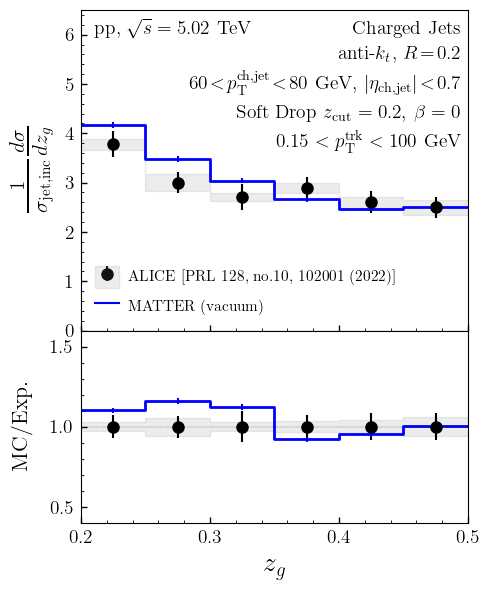

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
axt, axb  = axs



###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t1_pp_0-10_r02_60-80_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axt.errorbar(x_e, y_e, yerr=err_e, label='test', marker="o", linestyle="none", color = 'black',markersize=8)
esys = axt.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
theory_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t, y_t, err_t, xstep_t, ystep_t = GetData1(theory_data)
axt.step(xstep_t, ystep_t, where='post', color='blue',linestyle='solid', linewidth = 2)
axt.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='blue')
tcurve = axt.errorbar(0, 0, color='blue',linestyle='solid')
###############
# THEORY/EXP
axb.errorbar(x_e, y_e/y_e, yerr=err_e/y_e, marker="o", linestyle="none", color = 'black',markersize=8)
axb.fill_between(xstep_e, 1+sysp_e/ystep_e, 1+sysm_e/ystep_e, step='post', color='gray', alpha=0.15)
axb.step(xstep_t, ystep_t/ystep_e[1:], where='post', color='blue',linestyle='solid', linewidth = 2)
axb.errorbar(x_t, y_t/y_e[1:], err_t/y_e[1:], marker="", linestyle="none", color='blue')


###############
for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
    ax.set_xticks([0.2,0.3,0.4,0.5])
    ax.set_xlim(0.2,0.5)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
######
axt.set_ylim(0,6.5) 
axb.set_ylim(0.4,1.6) 
axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}$', fontsize=22, labelpad=8)
axb.set_ylabel(r'MC/Exp.', fontsize=16, labelpad=12)
axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
######
axt.text(0.21, 6, r'pp, $\sqrt{s} = 5.02$ TeV', fontsize = 14, ha = 'left')
axt.text(0.495, 6, r'Charged Jets', fontsize = 14, ha = 'right')
axt.text(0.495, 5.5, r'anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.9, r'$60\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!80$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.7$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.3, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
axt.text(0.495, 3.7, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')

handles = [(epoints,esys),tcurve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER (vacuum)']

axt.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_0-10_PP_R02.pdf')

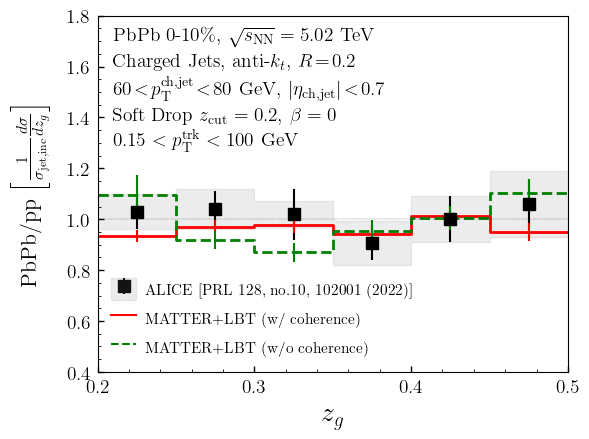

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))

###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t3_pbpb_over_pp_0-10_r02_60-80_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axs.errorbar(x_e, y_e, yerr=err_e, label='test', marker="s", linestyle="none", color = 'black',markersize=8)
esys = axs.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
# pp 
theory_pp_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_tp, y_tp, err_tp, xstep_tp, ystep_tp = GetData1(theory_pp_data)
# 1
line1 = ['red','solid']
theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_full_pbpb_0-5/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
theory1_2_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_full_pbpb_5-10/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
axs.step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
axs.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
t1curve = axs.errorbar(0, 0, color=line1[0],linestyle=line1[1])
# 1
line1 = ['green','dashed']
theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_no_q2_full_pbpb_0-10_a025/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.2_ptj60-80_rapj0.0-0.7_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
axs.step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
axs.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
t2curve = axs.errorbar(0, 0, color=line1[0],linestyle=line1[1])


# ###############
# for ax in axs.flat:
axs.tick_params(labelsize = 14)
axs.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
axs.set_xticks([0.2,0.3,0.4,0.5])
axs.set_xlim(0.2,0.5)    
axs.tick_params(width = 1, length = 4, pad=5)
axs.label_outer()
axs.set_ylim(0.4,1.8) 
axs.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
axs.set_ylabel(r'PbPb/pp $\left[\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}\right]$', fontsize=16, labelpad=12)
# ######
axs.text(0.21, 1.7, r'PbPb 0-10\%, $\sqrt{s_{\mathrm{NN}}} = 5.02$ TeV', fontsize = 14, ha = 'left')
axs.text(0.21, 1.6, r'Charged Jets, anti-$k_t$, $R\!=\!0.2$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.49, r'$60\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!80$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.7$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.39, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.29, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'left')

handles = [(epoints,esys),t1curve,t2curve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER+LBT (w/ coherence)', 'MATTER+LBT (w/o coherence)']

axs.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

# ## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_0-10_PbPb_R02.pdf')

# 0-10%, $R=0.4$, $80$-$100$ GeV/$c$

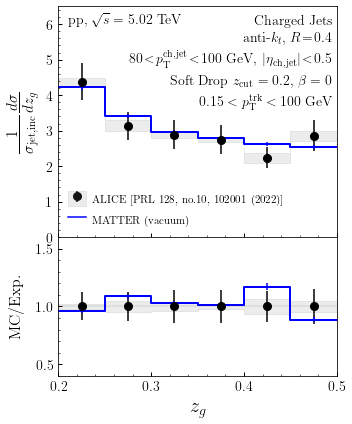

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
axt, axb  = axs



###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t13_pp_0-10_r04_80-100_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axt.errorbar(x_e, y_e, yerr=err_e, label='test', marker="o", linestyle="none", color = 'black',markersize=8)
esys = axt.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
theory_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj80-100_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t, y_t, err_t, xstep_t, ystep_t = GetData1(theory_data)
axt.step(xstep_t, ystep_t, where='post', color='blue',linestyle='solid', linewidth = 2)
axt.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='blue')
tcurve = axt.errorbar(0, 0, color='blue',linestyle='solid')
###############
# THEORY/EXP
axb.errorbar(x_e, y_e/y_e, yerr=err_e/y_e, marker="o", linestyle="none", color = 'black',markersize=8)
axb.fill_between(xstep_e, 1+sysp_e/ystep_e, 1+sysm_e/ystep_e, step='post', color='gray', alpha=0.15)
axb.step(xstep_t, ystep_t/ystep_e[1:], where='post', color='blue',linestyle='solid', linewidth = 2)
axb.errorbar(x_t, y_t/y_e[1:], err_t/y_e[1:], marker="", linestyle="none", color='blue')


###############
for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
    ax.set_xticks([0.2,0.3,0.4,0.5])
    ax.set_xlim(0.2,0.5)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
######
axt.set_ylim(0,6.5) 
axb.set_ylim(0.4,1.6) 
axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}$', fontsize=22, labelpad=8)
axb.set_ylabel(r'MC/Exp.', fontsize=16, labelpad=12)
######
axt.text(0.21, 6, r'pp, $\sqrt{s} = 5.02$ TeV', fontsize = 14, ha = 'left')
axt.text(0.495, 6, r'Charged Jets', fontsize = 14, ha = 'right')
axt.text(0.495, 5.5, r'anti-$k_t$, $R\!=\!0.4$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.9, r'$80\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!100$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.5$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.3, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
axt.text(0.495, 3.7, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')
axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')

handles = [(epoints,esys),tcurve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER (vacuum)']

axt.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_0-10_PP_R04.pdf')

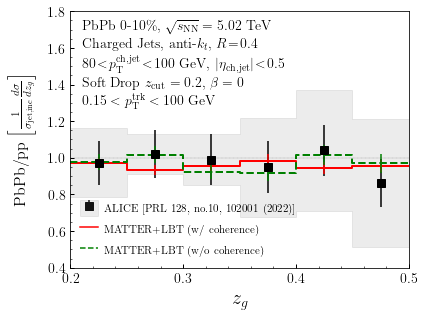

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))

###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t15_pbpb_over_pp_0-10_r04_80-100_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axs.errorbar(x_e, y_e, yerr=err_e, label='test', marker="s", linestyle="none", color = 'black',markersize=8)
esys = axs.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
# pp 
theory_pp_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj60-80_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_tp, y_tp, err_tp, xstep_tp, ystep_tp = GetData1(theory_pp_data)
# 1
line1 = ['red','solid']
theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_full_pbpb_0-5/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj80-100_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
theory1_2_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_full_pbpb_5-10/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj80-100_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
axs.step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
axs.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
tcurves = axt.errorbar(0, 0, color=line1[0],linestyle=line1[1])
# 1
line1 = ['green','dashed']
theory1_1_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_0-10/matter_lbt_no_q2_full_pbpb_0-10_a025/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj80-100_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData1(theory1_1_data)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
axs.step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
axs.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
t2curve = axt.errorbar(0, 0, color=line1[0],linestyle=line1[1])


# ###############
# for ax in axs.flat:
axs.tick_params(labelsize = 14)
axs.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
axs.set_xticks([0.2,0.3,0.4,0.5])
axs.set_xlim(0.2,0.5)    
axs.tick_params(width = 1, length = 4, pad=5)
axs.label_outer()
axs.set_ylim(0.4,1.8) 
axs.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
axs.set_ylabel(r'PbPb/pp $\left[\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}\right]$', fontsize=16, labelpad=12)
# ######
axs.text(0.21, 1.7, r'PbPb 0-10\%, $\sqrt{s_{\mathrm{NN}}} = 5.02$ TeV', fontsize = 14, ha = 'left')
axs.text(0.21, 1.6, r'Charged Jets, anti-$k_t$, $R\!=\!0.4$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.49, r'$80\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!100$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.5$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.39, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.29, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'left')

handles = [(epoints,esys),t1curve,t2curve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER+LBT (w/ coherence)', 'MATTER+LBT (w/o coherence)']

axs.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

# ## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_0-10_PbPb_R04.pdf')

# 30-50%, $R=0.4$, $60$-$80$ GeV/$c$

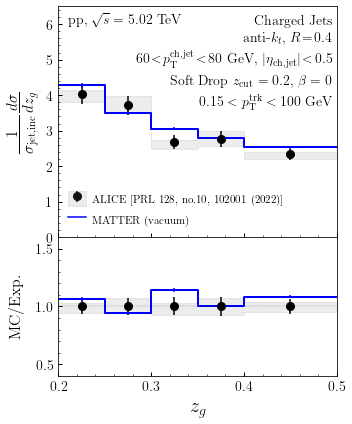

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(5, 6), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,3)})
axt, axb  = axs


###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t4_pp_30-50_r04_60-80_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axt.errorbar(x_e, y_e, yerr=err_e, label='test', marker="o", linestyle="none", color = 'black',markersize=8)
esys = axt.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
theory_data = '/Users/yasukitachibana/JETSCAPEDropbox/Data/ParentDataFolder/SubstructurePaper/SD_ALICE/SD_ALICE_30-50/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj60-80_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t, y_t, err_t, xstep_t, ystep_t = GetData1(theory_data)
x_t, y_t, err_t, xstep_t, ystep_t = CombineLast2Bins(x_t, y_t, err_t, xstep_t, ystep_t)
axt.step(xstep_t, ystep_t, where='post', color='blue',linestyle='solid', linewidth = 2)
axt.errorbar(x_t, y_t, err_t, marker="", linestyle="none", color='blue')
tcurve = axt.errorbar(0, 0, color='blue',linestyle='solid')
###############
# THEORY/EXP
axb.errorbar(x_e, y_e/y_e, yerr=err_e/y_e, marker="o", linestyle="none", color = 'black',markersize=8)
axb.fill_between(xstep_e, 1+sysp_e/ystep_e, 1+sysm_e/ystep_e, step='post', color='gray', alpha=0.15)
axb.step(xstep_t, ystep_t/ystep_e[1:], where='post', color='blue',linestyle='solid', linewidth = 2)
axb.errorbar(x_t, y_t/y_e[1:], err_t/y_e[1:], marker="", linestyle="none", color='blue')


###############
for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
    ax.set_xticks([0.2,0.3,0.4,0.5])
    ax.set_xlim(0.2,0.5)    
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
######
axt.set_ylim(0,6.5) 
axb.set_ylim(0.4,1.6) 
axt.set_ylabel(r'$\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}$', fontsize=22, labelpad=8)
axb.set_ylabel(r'MC/Exp.', fontsize=16, labelpad=12)
axb.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
######
axt.text(0.21, 6, r'pp, $\sqrt{s} = 5.02$ TeV', fontsize = 14, ha = 'left')
axt.text(0.495, 6, r'Charged Jets', fontsize = 14, ha = 'right')
axt.text(0.495, 5.5, r'anti-$k_t$, $R\!=\!0.4$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.9, r'$60\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!80$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.5$', fontsize = 14, ha = 'right')
axt.text(0.495, 4.3, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'right')
axt.text(0.495, 3.7, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'right')

handles = [(epoints,esys),tcurve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER (vacuum)']

axt.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_30-50_PP_R04.pdf')

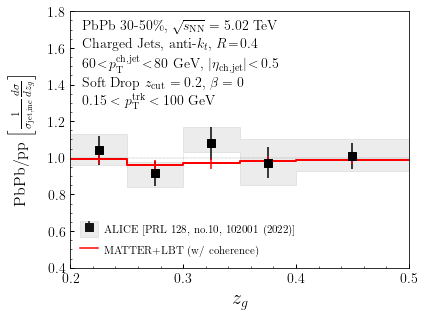

In [112]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))

###############
# EXP
exp_data = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/exp_data/hepdata_alice_groom_sf_5tev/t6_pbpb_over_pp_30-50_r04_60-80_zg.txt'
x_e, y_e, err_e, xstep_e, ystep_e, sysp_e, sysm_e = GetExpData(exp_data)
epoints = axs.errorbar(x_e, y_e, yerr=err_e, label='test', marker="s", linestyle="none", color = 'black',markersize=8)
esys = axs.fill_between(xstep_e, ystep_e+sysp_e, ystep_e+sysm_e, step='post', color='gray', alpha=0.15)
###############
# THEORY
# pp 
theory_pp_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/PP/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj60-80_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_tp, y_tp, err_tp, xstep_tp, ystep_tp = GetData1(theory_pp_data)
# 1
line1 = ['red','solid']
theory1_1_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/matter_lbt_full_pbpb_30-40/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj60-80_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
theory1_2_data = '/Users/yasukitachibana/GoogleDrive/Downloads/SD_ALICE_30-50/matter_lbt_full_pbpb_40-50/SoftDropGroom_hist_total_SoftDropGroom_zG_jetr0.4_ptj60-80_rapj0.0-0.5_pt0.1-100.0_rap0.0-0.9_beta0.00_zCut0.20.txt'
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetData2(theory1_1_data,theory1_2_data)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = GetDataRatio(x_t1, y_t1, err_t1, xstep_t1, ystep_t1, x_tp, y_tp, err_tp, xstep_tp, ystep_tp)
x_t1, y_t1, err_t1, xstep_t1, ystep_t1 = CombineLast2Bins(x_t1, y_t1, err_t1, xstep_t1, ystep_t1)
axs.step(xstep_t1, ystep_t1, where='post', color=line1[0],linestyle=line1[1], linewidth = 2)
axs.errorbar(x_t1, y_t1, err_t1, marker="", linestyle="none", color=line1[0])
tcurves = axt.errorbar(0, 0, color=line1[0],linestyle=line1[1])






# ###############
# for ax in axs.flat:
axs.tick_params(labelsize = 14)
axs.set_xlabel(r'$z_g$', fontsize=20, labelpad=6)
axs.set_xticks([0.2,0.3,0.4,0.5])
axs.set_xlim(0.2,0.5)    
axs.tick_params(width = 1, length = 4, pad=5)
axs.label_outer()
axs.set_ylim(0.4,1.8) 
axs.axhline(1, color = "black", linewidth=0.3, linestyle='dotted')
axs.set_ylabel(r'PbPb/pp $\left[\frac{1}{\sigma_{\mathrm{jet,inc}}}\frac{d\sigma}{d z_g}\right]$', fontsize=16, labelpad=12)
# ######
axs.text(0.21, 1.7, r'PbPb 30-50\%, $\sqrt{s_{\mathrm{NN}}} = 5.02$ TeV', fontsize = 14, ha = 'left')
axs.text(0.21, 1.6, r'Charged Jets, anti-$k_t$, $R\!=\!0.4$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.49, r'$60\!<\!p_{\mathrm{T}}^{\mathrm{ch,jet}}\!<\!80$ GeV, $|\eta_{\mathrm{ch,jet}}|\!<\!0.5$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.39, r'Soft Drop $z_{\mathrm{cut}}=0.2$, $\beta=0$', fontsize = 14, ha = 'left')
axs.text(0.21, 1.29, r'$0.15<p^{\mathrm{trk}}_{\mathrm{T}}<100$ GeV', fontsize = 14, ha = 'left')

handles = [(epoints,esys),t1curve]#,t2curve]
labels = ['ALICE [PRL 128, no.10, 102001 (2022)]', 'MATTER+LBT (w/ coherence)']
#, 'MATTER+LBT (w/o coherence)']

axs.legend(handles,labels,ncol=1,loc='lower left',edgecolor='none', frameon=True, facecolor='none', handletextpad=0.6, handleheight=1.8, labelspacing=0.5, bbox_to_anchor=(0, 0), borderaxespad=0.5, handlelength=1.6, fontsize=11)

# ## Generate PDF File
plt.tight_layout()
plt.savefig('Plots/ZG_SD_ALICE_30-50_PbPb_R04.pdf')